In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mediacompany/mediacompany.csv
/kaggle/input/media-company/mediacompany.csv


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("../input/mediacompany/mediacompany.csv")


In [9]:
df.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [10]:
df=df.drop(['Unnamed: 7'],axis=1)

In [11]:
df.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [12]:
#Converting dates to panda datetime format
df['Date']=pd.to_datetime(df['Date'])


In [13]:
df.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [14]:
#Deriving days since the shiws started
from datetime import date

d0=pd.to_datetime(date(2017,2,28))
d1=df['Date']
delta=d1-d0
df['Day']=delta

In [15]:
df.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [16]:
#CLEANING DAYS
df['Day']=df['Day'].astype(str)
df['Day']=df['Day'].map(lambda x:x[0:2])
df['Day']=df['Day'].astype(int)

In [17]:
df.shape

(80, 8)

In [18]:
df.head(10)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,6
6,2017-03-07,227313,1363579,1821742,1113811802,0,0,7
7,2017-03-08,180313,1353483,1795456,1083475096,0,0,8
8,2017-03-09,178800,1345428,1794157,1067636147,0,0,9
9,2017-03-10,201180,1344540,1834967,1081234843,0,0,10


<AxesSubplot:xlabel='Day'>

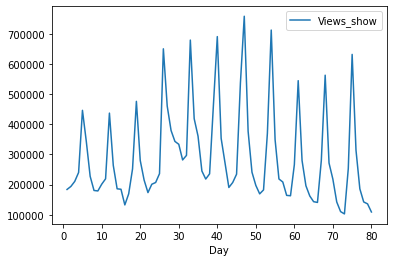

In [19]:
df.plot.line(x='Day',y='Views_show')

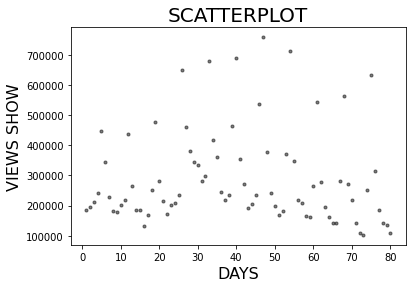

In [20]:
#SCATTER PLOT DAYS VS VIEWSHOWS
colors=(0,0,0)
area=np.pi*3
plt.scatter(df['Day'],df['Views_show'],s=area,c=colors,alpha=0.5)
plt.title('SCATTERPLOT',fontsize=20)
plt.xlabel('DAYS',fontsize=16)
plt.ylabel('VIEWS SHOW',fontsize=16)
plt.show()

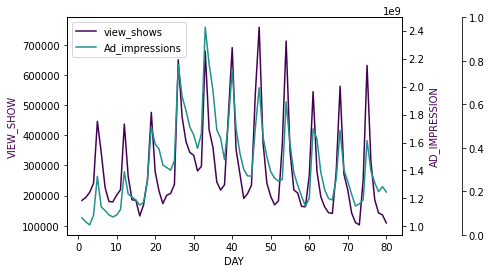

In [21]:
fig=plt.figure()
host=fig.add_subplot(111)

par1=host.twinx()
par2=host.twinx()

host.set_xlabel("DAY")
host.set_ylabel("VIEW_SHOW")
par1.set_ylabel("AD_IMPRESSION")

color1=plt.cm.viridis(0)
color2=plt.cm.viridis(0.5)
color3=plt.cm.viridis(.9)

p1, =host.plot(df.Day,df.Views_show,color=color1,label='view_shows')
p2, =par1.plot(df.Day,df.Ad_impression,color=color2,label='Ad_impressions')

lns=[p1,p2]
host.legend(handles=lns,loc='best')

#right,leftmtop,bottom

par2.spines['right'].set_position(('outward',60))
#no xticks
#par2.xaxis,set_ticks([])

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p1.get_color())

In [22]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
df['weekday'] = (df['Day']+3)%7
df.weekday.replace(0,7, inplace=True)
df['weekday'] = df['weekday'].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


RUNNING FIRST MODEL WEEKDAY AND VIEW SHOWS

In [23]:
X=df[['Visitors','weekday']]

y=df['Views_show']

In [24]:
from sklearn.linear_model import LinearRegression
lm1=LinearRegression()

In [25]:
lm1.fit(X,y)

LinearRegression()

In [26]:
import statsmodels.api as sm

X=sm.add_constant(X)


lm_1=sm.OLS(y,X).fit()

print(lm_1.summary())



                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           8.01e-12
Time:                        17:30:52   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.7

In [27]:
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

df['weekend']=[cond(i) for i in df['Day']]

In [28]:
df.head(5)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


In [29]:
X=df[['Visitors','weekend']]
y=df['Views_show']

In [30]:
import statsmodels.api as sm
X=sm.add_constant(X)
lm_2=sm.OLS(y,X).fit()

In [31]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           2.51e-12
Time:                        17:30:52   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

In [32]:
X=df[['Visitors','weekend','Character_A']]
y=df['Views_show']

In [33]:
X=sm.add_constant(X)
lm_3=sm.OLS(y,X).fit()
print(lm_3.params)

const          -47221.913254
Visitors            0.148026
weekend        181214.948506
Character_A     95424.646323
dtype: float64


In [34]:
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.53e-14
Time:                        17:30:52   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [35]:
#Create lag variables
df['Lag_Views']=np.roll(df['Views_show'],1)
df.Lag_Views.replace(108961,0,inplace=True)

In [36]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1,240061


In [37]:
x=df[['Visitors','weekend','Lag_Views','Character_A']]
y=df['Views_show']

In [38]:
x=sm.add_constant(x)
lm_4=sm.OLS(y,x).fit()

In [39]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           3.16e-21
Time:                        17:30:53   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

<AxesSubplot:>

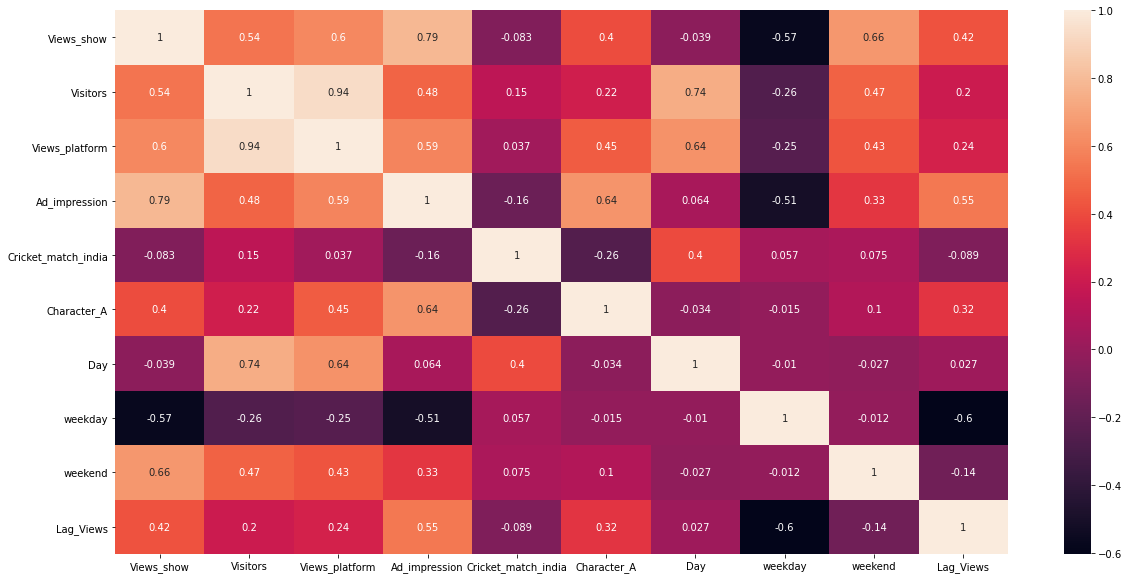

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [41]:
print(df.columns)

Index(['Date', 'Views_show', 'Visitors', 'Views_platform', 'Ad_impression',
       'Cricket_match_india', 'Character_A', 'Day', 'weekday', 'weekend',
       'Lag_Views'],
      dtype='object')


In [42]:
#Putting feature variable to x
x=df[['weekend','Character_A','Views_platform']]
y=df['Views_show']

In [43]:
import statsmodels.api as sm
x=sm.add_constant(x)
lm_5=sm.OLS(y,x).fit()
print(lm_5.summary())


                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           3.59e-15
Time:                        17:30:54   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

In [44]:
x=df[['weekend','Character_A','Visitors']]
y=df['Views_show']

In [45]:
x=sm.add_constant(x)
lm_6=sm.OLS(y,x).fit()

In [46]:
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.53e-14
Time:                        17:30:54   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [47]:
x=df[['weekend','Character_A','Visitors','Ad_impression']]
y=df['Views_show']

In [48]:
x=sm.add_constant(x)
lm_7=sm.OLS(y,x).fit()

In [49]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.10e-25
Time:                        17:30:54   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

In [50]:
X=df[['weekend','Character_A','Ad_impression']]
y=df['Views_show']

In [51]:
X=sm.add_constant(X)
lm_8=sm.OLS(y,X).fit()


In [52]:
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.05e-26
Time:                        17:30:54   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [53]:
#Ad_impression_millions
df['Ad_impression_million']=df['Ad_impression']/1000000

In [54]:
X=df[['weekend','Character_A','Ad_impression_million','Cricket_match_india']]
y=df['Views_show']

In [55]:
X=sm.add_constant(X)

lm_9=sm.OLS(y,X).fit()


In [56]:
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.02e-25
Time:                        17:30:54   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

In [57]:
# Putting feature variable to X
X = df[['weekend','Character_A','Ad_impression_million']]

# Putting response variable to y
y = df['Views_show']

In [58]:
X=sm.add_constant(X)
lm_10=sm.OLS(y,X).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 29 Apr 2021   Prob (F-statistic):           1.05e-26
Time:                        17:30:54   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

In [59]:
X = df[['weekend','Character_A','Ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_10.predict(X)

In [63]:
from sklearn.metrics import r2_score,mean_squared_error
R2=r2_score(df['Views_show'],Predicted_views)
mse=mean_squared_error(df['Views_show'],Predicted_views)

In [64]:
print(R2)
print(mse)

0.802643446857565
4677651616.2534075


Text(0, 0.5, 'VIEWS')

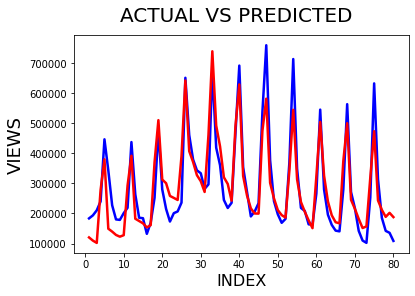

In [66]:
c=[i for i in range(1,81,1)]
fig=plt.figure()
plt.plot(c,df['Views_show'],color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,Predicted_views,color='red',linewidth=2.5,linestyle='-')
fig.suptitle("ACTUAL VS PREDICTED",fontsize=20)
plt.xlabel("INDEX",fontsize=16)
plt.ylabel("VIEWS",fontsize=18)

Text(0, 0.5, 'VIEWS_SHOW-PREDICTED_VIEWS')

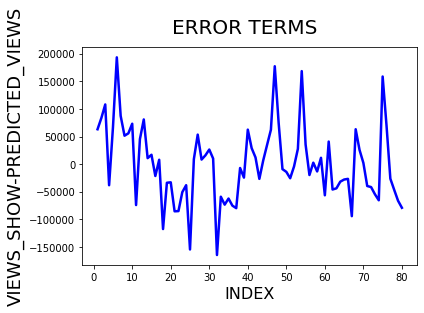

In [67]:
c=[i for i in range(1,81,1)]
fig=plt.figure()
plt.plot(c,df['Views_show']-Predicted_views,color='blue',linewidth=2.5,linestyle='-')

fig.suptitle("ERROR TERMS",fontsize=20)
plt.xlabel("INDEX",fontsize=16)
plt.ylabel("VIEWS_SHOW-PREDICTED_VIEWS",fontsize=18)